### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")
# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

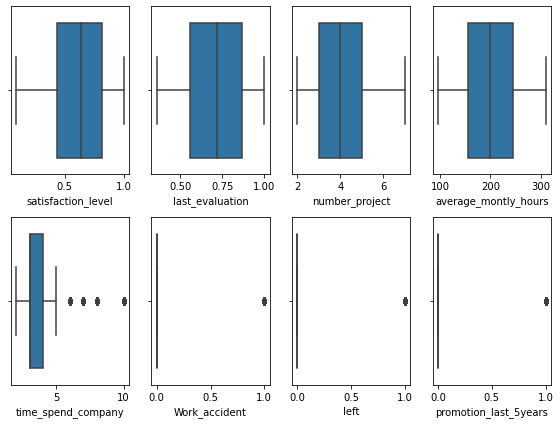

In [6]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, axes = plt.subplots(2, 4,figsize=(8,6))
sns.boxplot(x = df['satisfaction_level'], ax = axes[0,0])
sns.boxplot(x = df['last_evaluation'], ax = axes[0,1])
sns.boxplot(x = df['number_project'], ax = axes[0,2])
sns.boxplot(x = df['average_montly_hours'], ax = axes[0,3])
sns.boxplot(x = df['time_spend_company'], ax = axes[1,0])
sns.boxplot(x = df['Work_accident'], ax = axes[1,1])
sns.boxplot(x = df['left'], ax = axes[1,2])
sns.boxplot(x = df['promotion_last_5years'], ax = axes[1,3])
plt.tight_layout()

In [7]:
#identify outlier in the time_spend_company column
p25 = df['time_spend_company'].quantile(0.25)
p75 = df['time_spend_company'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75+1.5*iqr
lower_limit = p25+1.5*iqr
len(df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)])

13526

In [8]:
# Get numbers of people who left vs. stayed
print(len(df[df['left'] == 1]))
print(len(df[df['left'] == 0]))

# Get percentages of people who left vs. stayed
df['left'].value_counts(normalize=True)

3571
11428


0    0.761917
1    0.238083
Name: left, dtype: float64

In [9]:
df['Work_accident'].value_counts(normalize=True)

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [10]:
df['promotion_last_5years'].value_counts(normalize = True)

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

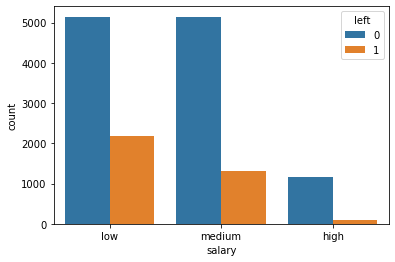

In [11]:
sns.countplot(x= df['salary'],hue=df['left'], data=df)
plt.show()

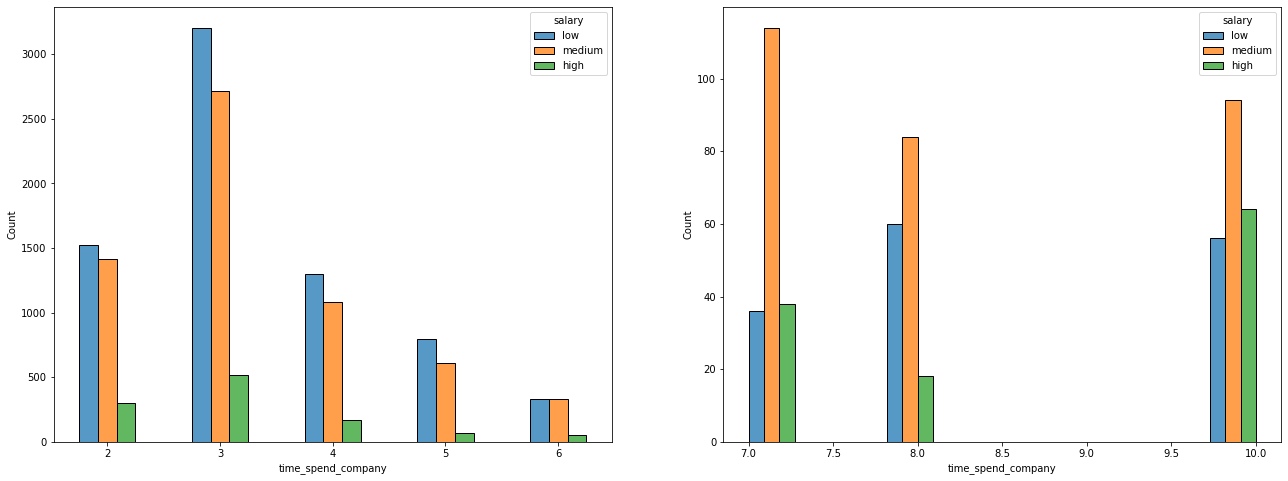

In [12]:
fig, ax = plt.subplots(1,2, figsize = (22,8))
#define tenure/time_spend_company less than 7 yrs
tenure_short = df[df['time_spend_company'] < 7]
tenure_long = df[df['time_spend_company'] > 6]
sns.histplot(data = tenure_short, x = 'time_spend_company', hue = 'salary', discrete = 1, hue_order= ['low', 'medium', 'high'],
            multiple = 'dodge', shrink = .5,  ax = ax[0])

sns.histplot(data = tenure_long , x = 'time_spend_company', hue = 'salary', hue_order = ['low', 'medium', 'high'], multiple = 'dodge',
             ax = ax[1])
plt.show()

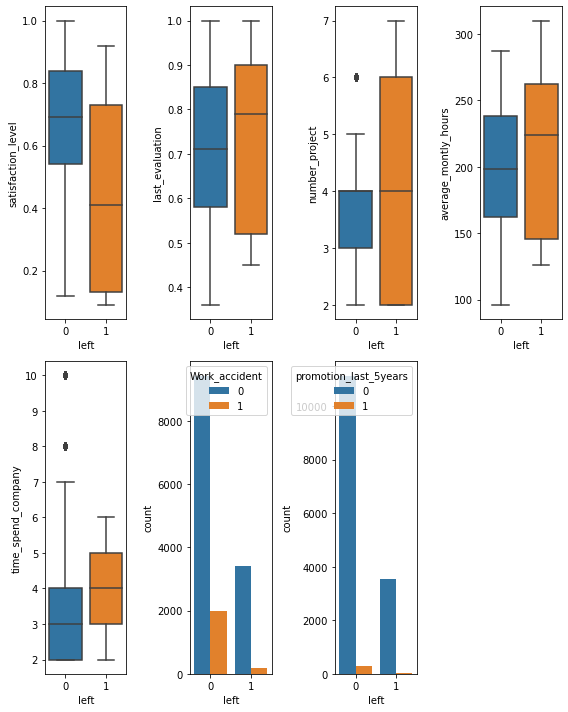

In [13]:
fig, axes = plt.subplots(2, 4,figsize=(8,10))
sns.boxplot(y = df['satisfaction_level'], x = df['left'],ax = axes[0,0])
sns.boxplot(y = df['last_evaluation'], x = df['left'], ax = axes[0,1])
sns.boxplot(y = df['number_project'], x = df['left'], ax = axes[0,2])
sns.boxplot(y = df['average_montly_hours'], x = df['left'], ax = axes[0,3])
sns.boxplot(y = df['time_spend_company'], x = df['left'], ax = axes[1,0])
sns.countplot(x = df['left'], hue = df['Work_accident'], ax = axes[1,1])
sns.countplot(x = df['left'], hue = df['promotion_last_5years'], ax = axes[1,2])
# Remove the empty subplot (axes[1, 3])
fig.delaxes(axes[1, 3])
plt.tight_layout()

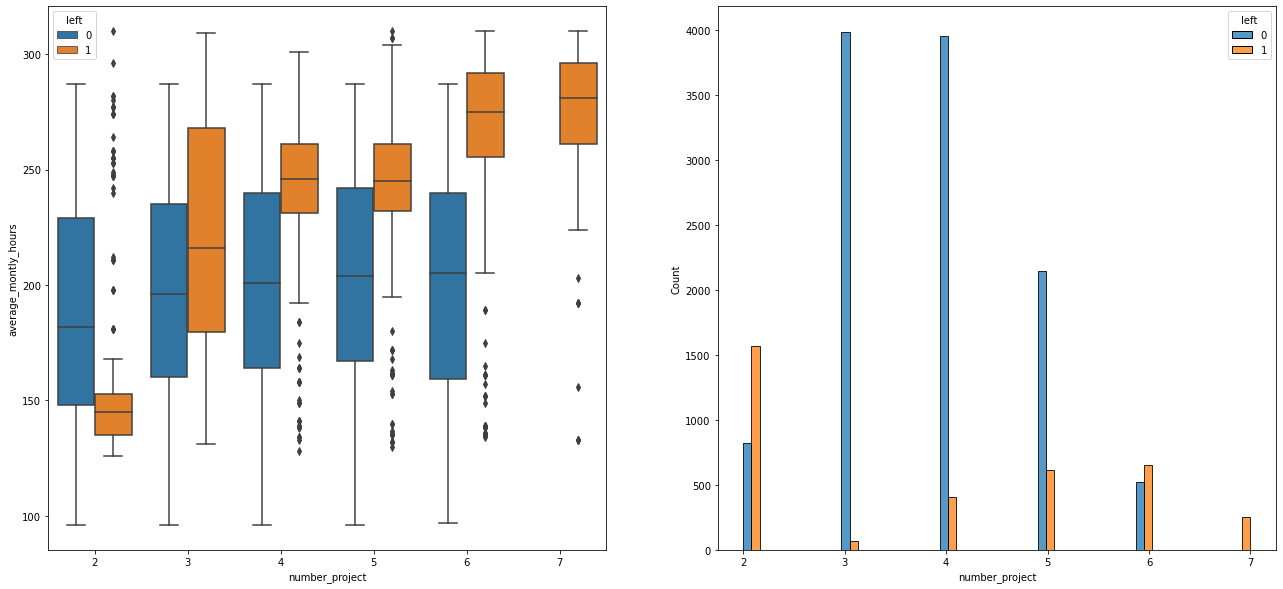

In [14]:
#number_project vs. avrage_montly_hours
fig, ax = plt.subplots(1,2, figsize = (22,10))
sns.boxplot(y = df['average_montly_hours'], x = df['number_project'], hue = df['left'], ax = ax[0])
sns.histplot(x = df['number_project'], hue = df['left'], ax = ax[1], multiple='dodge')
plt.show()

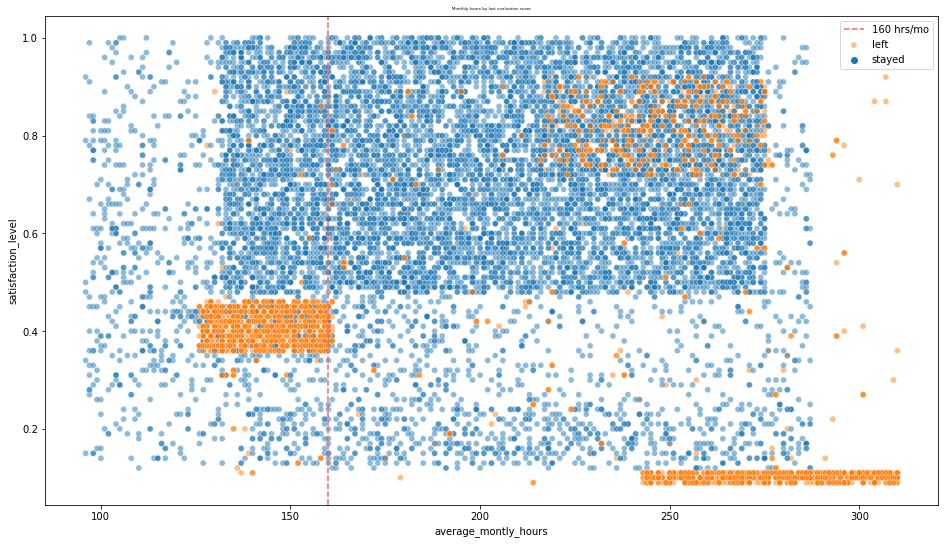

In [15]:
plt.figure(figsize = (16,9))
sns.scatterplot(x = df['average_montly_hours'], y = df['satisfaction_level'], hue = df['left'], alpha = .5)
plt.axvline(x = 160, color = '#ff6361', label = '160 hrs/mo', ls = '--')
plt.legend(labels = ['160 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = 4)
plt.show()

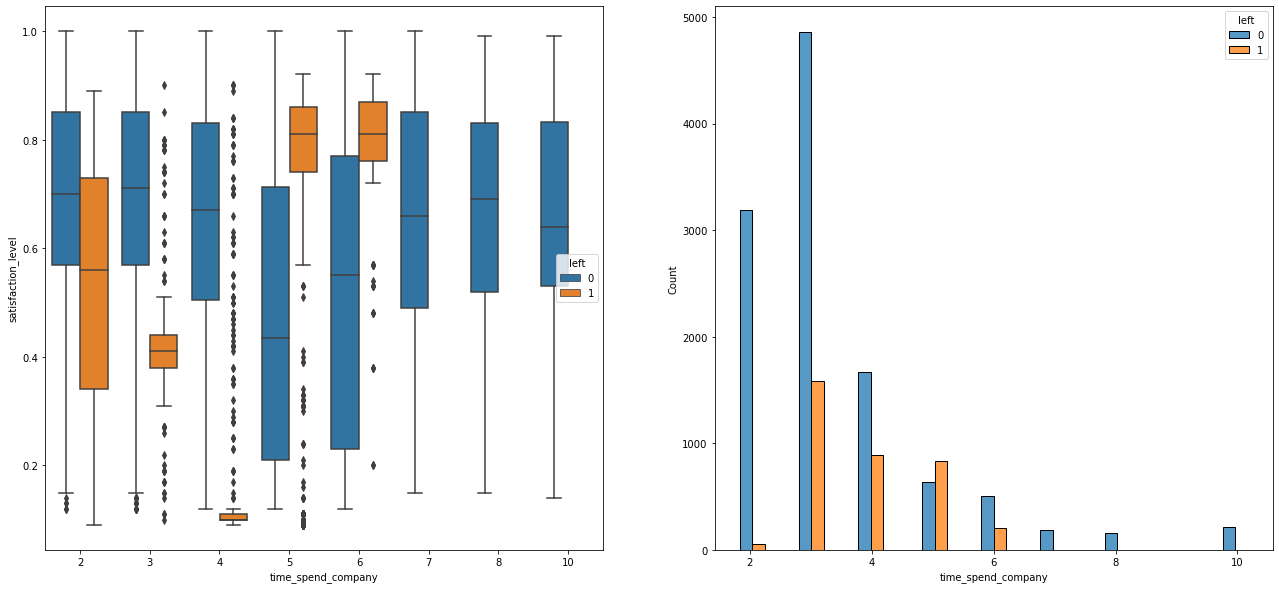

In [16]:
fig, ax = plt.subplots(1,2, figsize = (22,10))
sns.boxplot(x = df['time_spend_company'], y = df['satisfaction_level'], hue = df['left'], ax = ax[0])
sns.histplot(x = df['time_spend_company'], hue = df['left'], ax = ax[1], multiple='dodge', shrink = 5)
plt.show()

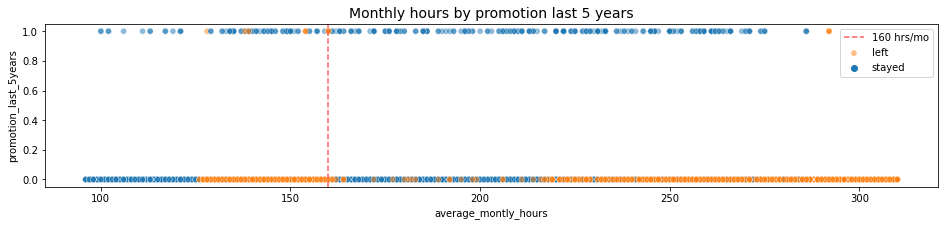

In [17]:
#plot employees get promoted or not for the long hours they worked
# create a plot to examine relationship between average monthly hours and promotion last 5 yrs
plt.figure(figsize = (16,3))
sns.scatterplot(data = df, x = 'average_montly_hours', y = 'promotion_last_5years', hue = 'left', alpha = .5)
plt.axvline(x = 160, color = '#ff6361', ls = '--')
plt.legend(labels = ['160 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize = '14')
plt.show()

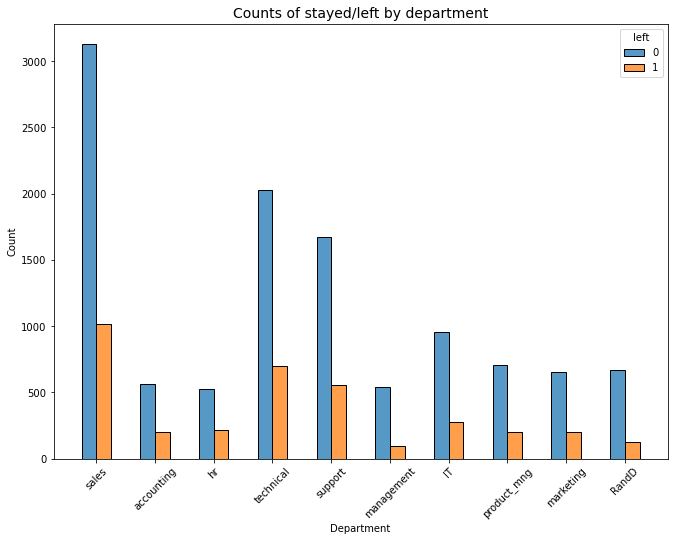

In [18]:
#check and compare different department distribution of employees who left to that of employees who did not
plt.figure(figsize=(11,8))
sns.histplot(data = df, x = 'Department', hue = 'left', hue_order = [0,1], shrink = .5, multiple='dodge')
plt.xticks(rotation = '45')
plt.title('Counts of stayed/left by department', fontsize = 14)
plt.show()

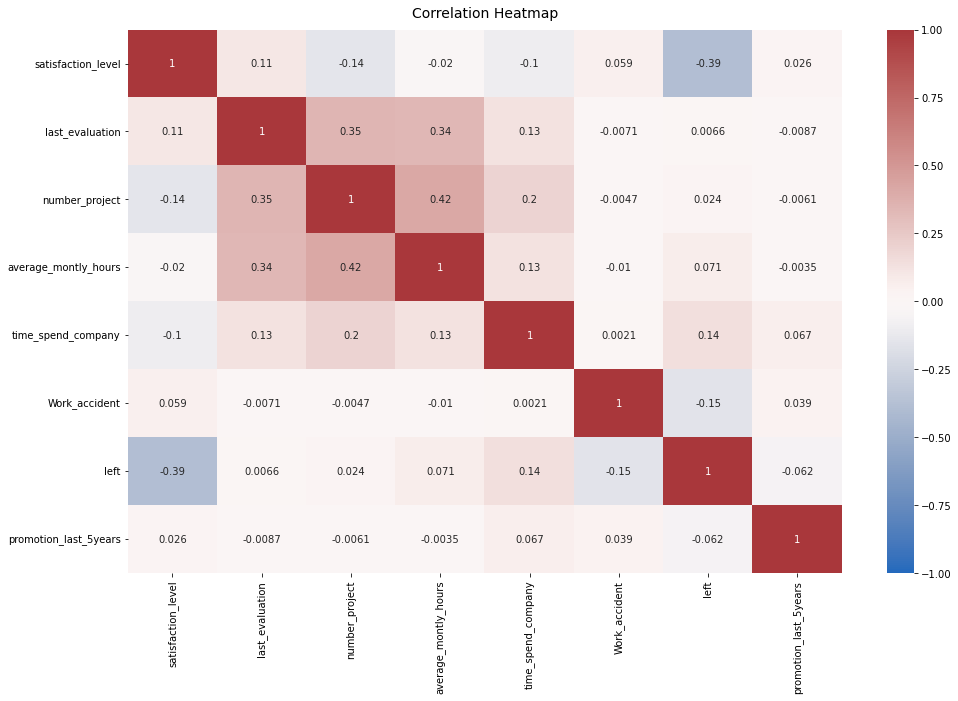

In [19]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap= True))
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 14}, pad = 12);

In [20]:
sorted_depart = pd.crosstab(df.Department, df.left, margins = True, normalize=True)
sorted_depart.sort_values(by = 'All', ascending = False)

left,0,1,All
Department,,,
All,0.761917,0.238083,1.000000
sales,0.208414,0.067605,0.276018
technical,0.134876,0.046470,0.181345
support,0.111607,0.037002,0.148610
IT,0.063604,0.018201,0.081805
product_mng,0.046936,0.013201,0.060137
marketing,0.043670,0.013534,0.057204
RandD,0.044403,0.008067,0.052470
accounting,0.037536,0.013601,0.051137


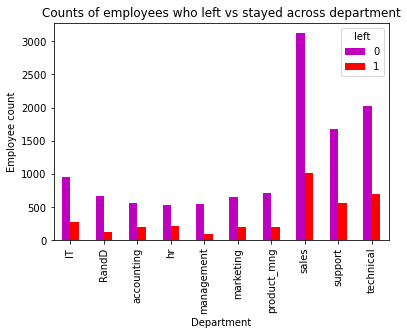

In [21]:
pd.crosstab(df['Department'], df['left']).plot(kind = 'bar', color = 'mr')
plt.title('Counts of employees who left vs stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

### Model Building

In [23]:
## remove outliers from column time_spend_company
df_encode = pd.get_dummies(df, drop_first=True)
# df_encode.head()
df_rmout = df_encode[(df_encode['time_spend_company'] <= upper_limit) | (df_encode['time_spend_company'] >= lower_limit)]
df_rmout.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
# Drop `satisfaction_level` and save resulting dataframe in new variable. 
df_rmout2 = df_rmout.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df_rmout2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [26]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df_rmout2['overworked'] = df_rmout2['average_montly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_rmout2['overworked'].max())
print('Min hours:', df_rmout2['overworked'].min())

Max hours: 310
Min hours: 96


In [28]:
# Define `overworked` as working > 175 hrs/week
df_rmout2['overworked'] = (df_rmout2['overworked'] > 175).astype(int)

# Display first few rows of new column
df_rmout2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [29]:
# Isolate the outcome variable
y = df_rmout2['left']

# Select the features
X = df_rmout2.drop(['left', 'average_montly_hours'], axis=1)

In [30]:
X.head()

,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.86,5,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.88,7,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.87,5,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [31]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision Tree

In [32]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [33]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.69 s, sys: 0 ns, total: 2.69 s
Wall time: 2.69 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [34]:
# Get all CV scores
from metric_results import make_results
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
# print(tree1_cv_results)
print(tree2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.919452  0.891703  0.905234  0.955552  0.970814


#### Random forest

In [35]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 8min 42s

CPU times: user 8min 41s, sys: 982 ms, total: 8min 42s
Wall time: 8min 42s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [37]:
# Write pickle
from writeModel import write_pickle
from importModel import read_pickle
path = '.'
write_pickle(path, rf2, 'hy_rf2')
# Read in pickle
rf2 = read_pickle(path, 'hy_rf2')

In [39]:
# Check best params
print(rf2.best_params_)
# Check best AUC score on CV
print(rf2.best_score_)

{'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
0.9801240674618681


In [40]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.919452  0.891703  0.905234  0.955552  0.970814
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.931028  0.923073  0.926934   0.96533  0.980124


In [41]:
# Get predictions on test data
from get_model_scores import get_scores
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.929844,0.93505,0.93244,0.967733,0.9565


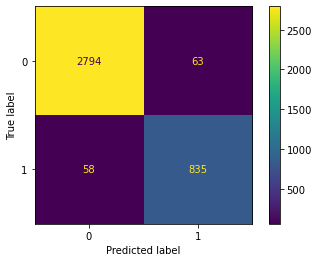

In [42]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='')

#### Decision tree plot

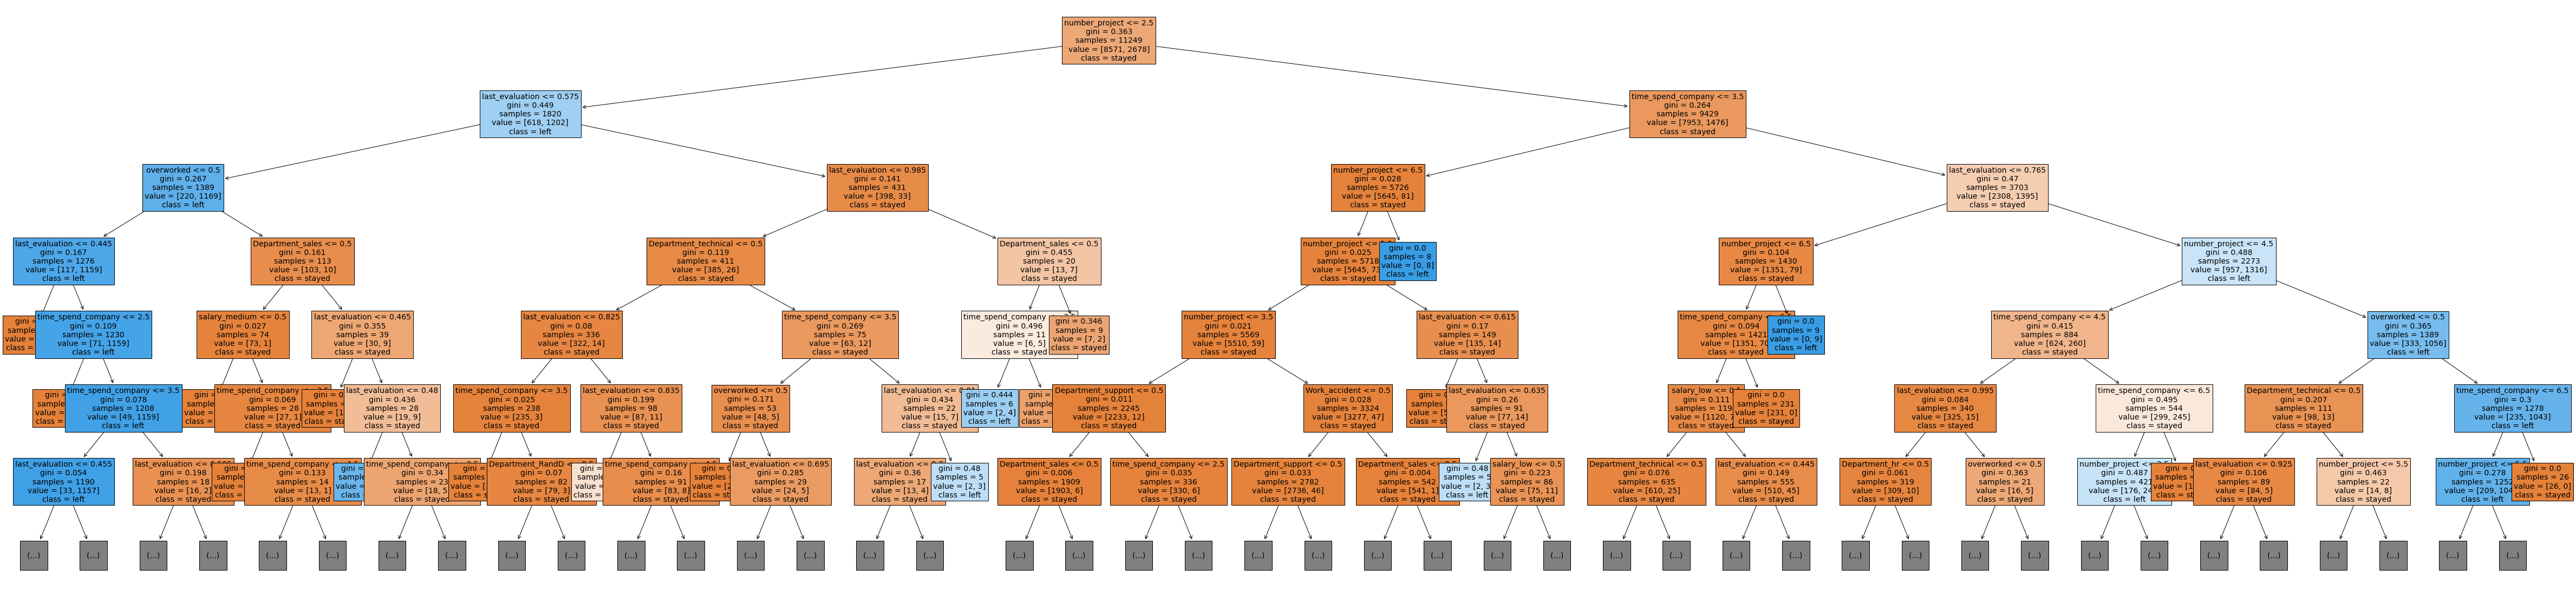

In [43]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [44]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.313888
last_evaluation,0.310288
time_spend_company,0.267595
overworked,0.082309
salary_low,0.007145
Department_technical,0.004650
salary_medium,0.003338
Department_sales,0.002574
Work_accident,0.002157
promotion_last_5years,0.001403


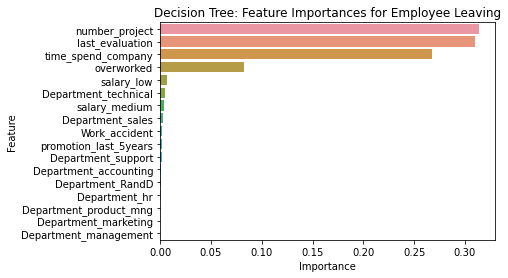

In [45]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random forest feature importance

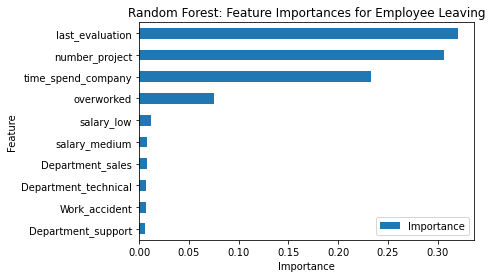

In [46]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()